In [ ]:
!pip install scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

# Vectorisation des textes du corpus à l'aide d'une approche "bag of words" 


Pour débuter l'analyse des textes du corpus, il est nécessaire de vectoriser ces textes. Pour ce faire, nous utilisons une approche "bag of words".

In [62]:
def vectorisation_bag_of_words(corpus):
    """
    Vectorise un corpus de texte avec l'approche Bag of Words.

    Arguments:
    - corpus (list): Une liste de chaînes de texte.

    Sortie:
    - tuple: (Matrice BoW, Liste des mots)
    """
    # Initialiser le CountVectorizer
    vectoriseur = CountVectorizer()

    # Appliquer le CountVectorizer sur le corpus
    matrice_bow = vectoriseur.fit_transform(corpus)

    # Liste des mots (caractéristiques)
    mots = vectoriseur.get_feature_names_out()

    return matrice_bow, mots

# Regrouper les textes d'un corpus en cluster


Une fois les textes du corpus vectorisés, on cherche à les classer selon leur thématiques. Pour celà on applique la méthode des k-means.

In [63]:
from sklearn.cluster import KMeans
from scipy.sparse import csr_matrix

def clustering_kmeans_lignes(matrice_sparse, nombre_clusters):
    """
    Effectue le clustering des lignes d'une matrice sparse avec la méthode des k-means.

    Arguments:
    - matrice_sparse (scipy.sparse.csr_matrix): Matrice sparse.
    - nombre_clusters (int): Nombre de clusters à former.

    Sortie:
    - numpy.ndarray: Tableau des étiquettes de cluster pour chaque texte du corpus.
    """
    if not isinstance(matrice_sparse, csr_matrix):
        raise ValueError("La matrice doit être au format csr_matrix.")


    # Appliquer la méthode des k-means
    kmeans = KMeans(n_clusters=nombre_clusters, random_state=42)
    etiquettes_clusters = kmeans.fit_predict(matrice_sparse)

    return etiquettes_clusters

# Analyse en composante principale et représentation graphique

Afin de pouvoir visualiser les données, nous effecturons une analyse en composante principale (ACP) de manière à construire un espace vectoriel de plus petite dimension sur lequel projetter les données. De cette manière, nous pourrons construire un espace vectoriel à 2 dimensions sur lequel représenter graphiquement les données


In [64]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import pandas as pd

def pca_on_sparse_matrix(sparse_matrix, num_components=2):
    """
    Perform Principal Component Analysis (PCA) on a sparse matrix.

    Args:
    - sparse_matrix (scipy.sparse.csr_matrix): Sparse matrix representing a set of points.
    - num_components (int): Number of principal components to retain.

    Returns:
    - pd.DataFrame: Coordinates of the vectors in the new basis.
    - pd.DataFrame: Coordinates of the points projected onto the new basis.
    """
    if not isinstance(sparse_matrix, csr_matrix):
        raise ValueError("The matrix must be in csr_matrix format.")

    # Apply TruncatedSVD to perform PCA on the sparse matrix
    svd = TruncatedSVD(n_components=num_components)
    principal_components = svd.fit_transform(sparse_matrix)

    # Create a DataFrame for the coordinates of vectors in the new basis
    pc_columns = [f'PC{i}' for i in range(1, num_components + 1)]
    df_principal_components = pd.DataFrame(principal_components, columns=pc_columns)

    # Project the points onto the new basis
    #projected_points = svd.inverse_transform(principal_components)

    # Create a DataFrame for the coordinates of the projected points
    #df_projected_points = pd.DataFrame(projected_points)

    return df_principal_components #df_projected_points

# Example usage
# Suppose sparse_matrix is your sparse matrix
# and you want to retain 2 principal components
#df_components, df_projection = pca_on_sparse_matrix(matrice_bow, num_components=2)
#print("Coordinates of vectors in the new basis:\n", df_components)
#print("\nCoordinates of the projected points in the new basis:\n", df_projection)

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

def tracer_points(data_frame, label_col=None, title=None):
    """
    Trace les points d'un DataFrame à deux colonnes dans l'espace.

    Arguments:
    - data_frame (pandas.DataFrame): DataFrame avec deux colonnes représentant les coordonnées des points.
    - label_col (str, optional): Nom de la colonne contenant les étiquettes (si disponible).
    - title (str, optional): Titre du graphique.
    - xlabel (str, optional): Libellé de l'axe des abscisses.
    - ylabel (str, optional): Libellé de l'axe des ordonnées.
    """
    plt.figure(figsize=(8, 8))

    if label_col is not None:
        labels = data_frame[label_col]
        scatter = plt.scatter(data_frame.iloc[:, 0], data_frame.iloc[:, 1], c=labels, cmap='viridis', marker='o', colors="red")
        plt.legend(*scatter.legend_elements(), title=label_col)
    else:
        plt.scatter(data_frame.iloc[:, 0], data_frame.iloc[:, 1], marker='o')

    plt.title(title)
    plt.grid(True)
    plt.show()

# Illustration et test de nos fonction sur un corpus très simple 

Afin de vérifier nos fonctions et d'illustrer notre démarche d'analyse textuelle, nous définissons dans cette partie un corpus très simple sur lequel nous menons une analyse textuelle à l'aide des fonctions définies précedemment.

In [67]:
corpus_exemple_simple=["Ceci est le premier texte.","Ceci est le deuxième texte.","Ceci est le troisième texte.","Iokanaan adore faire du Python","Jules adore faire du Python","Colin adore faire du python"]
corpus_exemple_un_peu_moins_simple = ["Ceci est le premier texte du corpus.", "Et voici maintenant le second texte du corpus.","Est-ce que ce texte est très différent des précédents textes du corpus?" "Nous sommes allés en soirée Lundi.","J'aime bien les frites","J'aime aussi la purée","Mathieu n'aime pas les frites"]
#On crée un corpus de texte très simple avec 6 texte qu'on classe intuitivement en deux groupes très homogènes.

Dans  ce corpus très simple que nous avons crée, deux groupes de textes très similaires apparaissent intuitivement. Nous allons appliquer les méthodes d'analyse textuelles définies précédemment.

Tout d'abord nous allons vectoriser ce corpus de textes.

In [12]:
matrice_bow, mots = vectorisation_bag_of_words(corpus_exemple_simple)
print("On obtient la matrice suivante :")
print(matrice_bow.toarray())
print("Les lignes de la matrice correspondent aux différents textes du corpus. Les colonnes de la matrice correspondent, dans l'ordre, au nombre d'apparition dans le texte des mots suivants :")
print(mots)


On obtient la matrice suivante :
[[0 1 0 0 0 1 0 0 0 1 1 0 1 0]
 [0 1 0 1 0 1 0 0 0 1 0 0 1 0]
 [0 1 0 0 0 1 0 0 0 1 0 0 1 1]
 [1 0 0 0 1 0 1 1 0 0 0 1 0 0]
 [1 0 0 0 1 0 1 0 1 0 0 1 0 0]
 [1 0 1 0 1 0 1 0 0 0 0 1 0 0]]
Les lignes de la matrice correspondent aux différents textes du corpus. Les colonnes de la matrice correspondent, dans l'ordre, au nombre d'apparition dans le texte des mots suivants :
['adore' 'ceci' 'colin' 'deuxième' 'du' 'est' 'faire' 'iokanaan' 'jules'
 'le' 'premier' 'python' 'texte' 'troisième']


Maintenant que ce corpus est vectorisé, nous allons effectuer un clustering avec la méthode des kmeans pour séparer le corpus en deux groupes de textes. 

In [68]:
etiquettes_clusters_lignes = clustering_kmeans_lignes(matrice_bow, 2)
print("Étiquettes des clusters pour les différents textes du corpus :", etiquettes_clusters_lignes)

C:\Users\pourt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Étiquettes des clusters pour les différents textes du corpus : [0 1 0 ... 1 1 0]


On obtient bien deux clusters, le premier regroupant les trois premiers textes, le troisième regroupant les trois suivant. La répartition des textes ainsi obtenue correspond bien à la répartition intuitive.

Nous allons désormais effectuer une ACP pour permettre de représenter graphiquement les textes du corpus et de visualiser les proximités entre les textes.

Projection des vecteurs représentant les textes dans la nouvelle base de dimension 2:
              PC1        PC2
0      26.509543  -8.930955
1      39.834985   2.099759
2      23.349110  -0.930355
3      26.464344  -0.430459
4      19.585619  -3.865054
...          ...        ...
14242  38.991136  -0.514015
14243  13.579119   2.669975
14244  38.315040  -0.284661
14245  36.780411  10.630015
14246  26.704806   2.124843

[14247 rows x 2 columns]


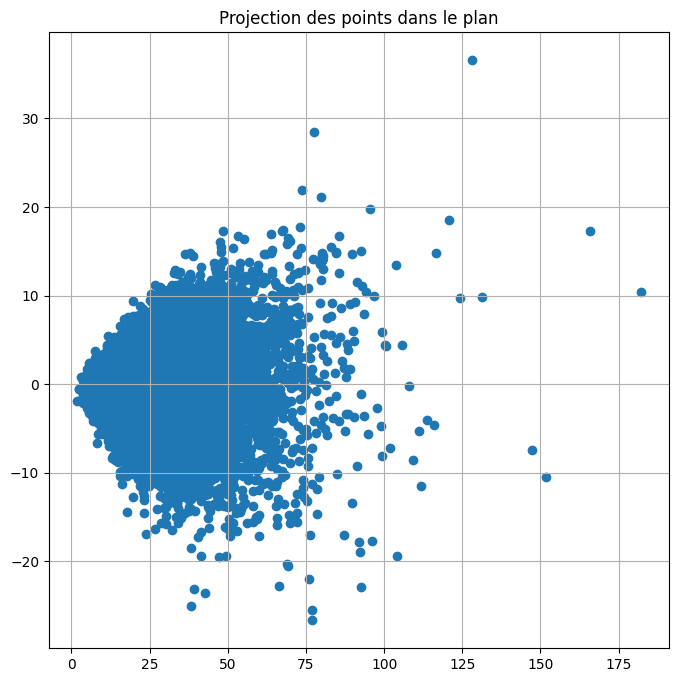

In [69]:
df_components = pca_on_sparse_matrix(matrice_bow, num_components=2)
#df_components, df_projection =pca_and_project_sparse_matrix(matrice_bow, target_dimension=2)
print("Projection des vecteurs représentant les textes dans la nouvelle base de dimension 2:\n", df_components)
tracer_points(df_components, title='Projection des points dans le plan')
#print(len(df_projection))

Deux points seulement apparaissent sur le graphique alors qu'il devrait y en avoir 6 (il y a 6 textes dans le corpus). Mais en y regardant de plus près, les points correspondant à un même groupe de texte étant extrêmement proches, ils se confondent sur le graphique.

# Analyse du corpus des questions à l'Assemblée nationale 

Maintenant que nous avons vérifié nos fonctions, nous allons les appliquer au corpus des questions écrites au gouvernement.

On importe le corpus sous la forme d'un DataFrame panda.

In [70]:
import pandas as pd
df_questions = pd.read_csv('../../PythonPourLaDataScience/Datascrapping/data_cleaned.csv', encoding='utf-8', sep='|')
print(df_questions.head)


<bound method NDFrame.head of           id                                            groupe  \
0          1  Libertés, Indépendants, Outre-mer et Territoires   
1          2                                  Les Républicains   
2          3                 Démocrate (MoDem et Indépendants)   
3          4                                       Renaissance   
4          5  Libertés, Indépendants, Outre-mer et Territoires   
...      ...                                               ...   
14242  14243                            Rassemblement National   
14243  14244                         Socialistes et apparentés   
14244  14245          Gauche démocrate et républicaine - NUPES   
14245  14246                 Démocrate (MoDem et Indépendants)   
14246  14247                                  Les Républicains   

                           nom  \
0       M. Christophe Naegelen   
1            M. Pierre Cordier   
2            M. Frédéric Petit   
3      Mme Marie-Pierre Rixain   
4      

Ensuite, on vectorise les textes du corpus à l'aide de la fonction écrite précédemment.

In [41]:
matrice_bow, mots = vectorisation_bag_of_words(df_questions['question'])

Nous regroupons les textes en cluster

In [42]:
etiquettes_clusters_lignes = clustering_kmeans_lignes(matrice_bow, 11)
print("Étiquettes des clusters pour les différents texte du corpus :", etiquettes_clusters_lignes)

C:\Users\pourt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Étiquettes des clusters pour les différents texte du corpus : [ 4 10  9 ... 10 10  0]


Afin de pouvoir analyser les regroupements obtenus, nous définissons les deux fonctions suivantes

In [43]:
def thematique_cluster(df,liste_etiquette_cluster,indice_cluster):
    liste_thematique=[]
    for i in range(len(liste_etiquette_cluster)):
        if liste_etiquette_cluster[i]==indice_cluster:
            liste_thematique.append(df["rubrique"][i])
    return liste_thematique

In [44]:
print(thematique_cluster(df_questions,etiquettes_clusters_lignes,0))

['fonction publique hospitalière', 'retraites : généralités', 'pharmacie et médicaments', 'police', 'santé', 'enseignement', 'enseignement secondaire', 'enseignement supérieur', 'établissements de santé', 'maladies', 'propriété', 'santé', 'agriculture', 'énergie et carburants', 'enseignement', 'enseignement supérieur', 'fonction publique territoriale', 'logement', 'postes', 'professions de santé', 'professions de santé', 'professions et activités sociales', 'santé', 'taxe sur la valeur ajoutée', 'traités et conventions', 'transports aériens', 'anciens combattants et victimes de guerre', 'animaux', 'assurance maladie maternité', 'commerce et artisanat', 'impôts locaux', 'justice', 'lieux de privation de liberté', 'maladies', 'ordre public', 'postes', 'santé', 'sécurité des biens et des personnes', 'télécommunications', 'agriculture', 'animaux', 'assurance maladie maternité', 'assurance maladie maternité', 'assurance maladie maternité', 'chambres consulaires', 'déchets', 'enseignement', 

In [45]:
def groupe_cluster(df,liste_etiquette_cluster,indice_cluster):
    liste_groupes=[]
    for i in range(len(liste_etiquette_cluster)):
        if liste_etiquette_cluster[i]==indice_cluster:
            liste_groupes.append(df["groupe"][i])
    return liste_groupes

In [46]:
print(groupe_cluster(df_questions,etiquettes_clusters_lignes,1))

['Renaissance', 'Gauche démocrate et républicaine - NUPES', 'Horizons et apparentés', 'Gauche démocrate et républicaine - NUPES', 'Rassemblement National', 'Libertés, Indépendants, Outre-mer et Territoires', 'Rassemblement National', 'Les Républicains', 'Rassemblement National', 'Les Républicains', 'Gauche démocrate et républicaine - NUPES', 'La France insoumise - Nouvelle Union Populaire écologique et sociale', 'Les Républicains', 'Renaissance', 'Rassemblement National', 'Les Républicains', 'Rassemblement National', 'Rassemblement National', 'La France insoumise - Nouvelle Union Populaire écologique et sociale', 'La France insoumise - Nouvelle Union Populaire écologique et sociale', 'Les Républicains', 'Démocrate (MoDem et Indépendants)', 'Socialistes et apparentés', 'Rassemblement National', 'Rassemblement National', 'Libertés, Indépendants, Outre-mer et Territoires', 'Les Républicains', 'Les Républicains', 'Socialistes et apparentés', 'Rassemblement National', 'Démocrate (MoDem et I

Nous définissons la fonction "homogénéité" pour une variable (groupe politique, ministère interrogé, rubrique) et une valeur prise par cette variable comme le nombre d'apparition de textes correspondants à cette variable dans le cluster où elle apparaît le plus sur le nombre total d'apparition de cette variable. 

In [47]:
def homogeneite_cluster(df,variable,valeur_variable,liste_etiquette_cluster,nb_clusters):
    apparitions_par_cluster=[0 for i in range(nb_clusters)]
    for i in range(len(liste_etiquette_cluster)):
        if df[variable][i]==valeur_variable:
            apparitions_par_cluster[liste_etiquette_cluster[i]]+=1
    return max(apparitions_par_cluster)/sum(apparitions_par_cluster)

In [48]:
homogeneite_cluster(df_questions,'groupe','La France insoumise - Nouvelle Union Populaire écologique et sociale',etiquettes_clusters_lignes,11)

0.13215623327982878

In [49]:
import matplotlib.pyplot as plt
import numpy as np

def tracer_fonctions(df, variable, val_var1, val_var2, max_nb_cluster):
    """
    Trace deux fonctions mathématiques sur un même graphe.

    Args:
    - fonction1 (callable): Première fonction à tracer.
    - fonction2 (callable): Deuxième fonction à tracer.
    - points (list): Liste d'entiers pour l'échantillonnage des points.

    Returns:
    - None
    """
    # Échantillonnage des points
    liste_nombre_clusters = list(range(1,max_nb_cluster))
    # Calcul des valeurs des fonctions pour chaque point
    matrice_bow, mots = vectorisation_bag_of_words(df_questions['question'])
    

    y1=[]
    y2=[]

    for i in range(1,max_nb_cluster):
        etiquettes_clusters_lignes = clustering_kmeans_lignes(matrice_bow, i)

        y1.append(homogeneite_cluster(df, variable,val_var1,etiquettes_clusters_lignes,i))


        y2.append(homogeneite_cluster(df, variable,val_var2,etiquettes_clusters_lignes,i))
    print(len(y1))
    print(len(liste_nombre_clusters))
    # Tracer les courbes
    plt.plot(liste_nombre_clusters, y1, label=val_var1)
    plt.plot(liste_nombre_clusters, y2, label=val_var2)

    # Ajouter des étiquettes et une légende
    plt.xlabel("Nombre de clusters")
    plt.ylabel("Homogénéité")
    plt.title("Évolution de la fonction d'homogénéité en fonction du nombre de clusters")
    plt.legend()

    # Afficher le graphe
    plt.show()


19
19


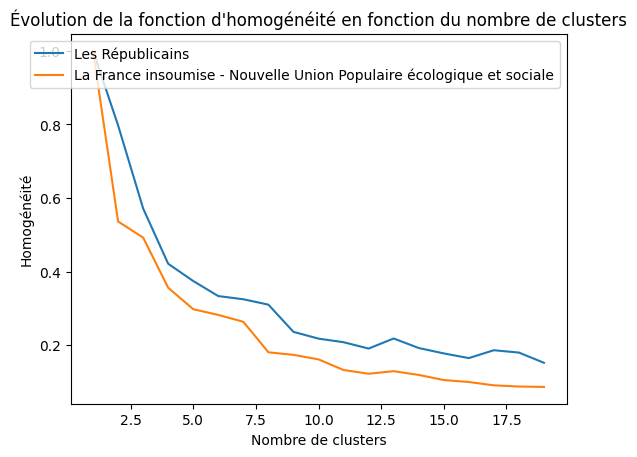

In [50]:
tracer_fonctions(df_questions,'groupe','Les Républicains','La France insoumise - Nouvelle Union Populaire écologique et sociale',20)

Nous avons tracé l'évoulution de l'homogénéité en fonction du nombre de clusters pour les groupes politiques Les Républicains et la France Insoumise. On observe une très forte décroissance avec le nombre de clusters ce qui semble indiquer que la clusterisation ne permet pas de faire émerger les tendances politiques des questions.

C:\Users\pourt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


19
19


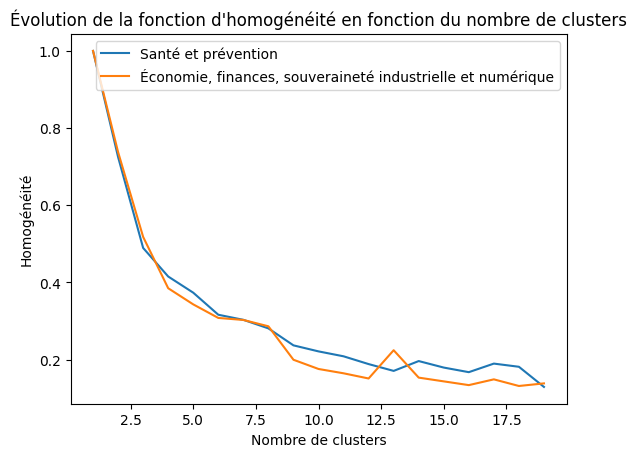

In [58]:
tracer_fonctions(df_questions,'ministère_interrogé','Santé et prévention','Économie, finances, souveraineté industrielle et numérique',20)

De même, nous avons là tracé l'évolution de l'homogénéïté pour les questions adressées aux ministères de la santé et de l'économie. Là encore, la décroissance de l'homogénéïté est très marquée, ce qui semble indiquer que la clusterisation ne permet pas de déceler les thématiques des questions. 

Ainsi, il semble donc que la vectorisation effectuée ne permet pas de mettre en lumière les tendances politiques des questions de notre corpus ni même d'en trouverla thématique. En effet, la vectorisation avec l'approche "bag of words"que mous avons effectuée est trop naïve et l'analyse est polluée par la présence de mots qui ne n'indiquent ni une thématique particulière ni une tendance politique donnée et dont la répartition dans les textes peut être modélisée comme aléatoire. Afin de classifier les textes par thématiques et de faire une étude ultérieure sur les tendances des textes politiques, il semble nécessaire d'effectuer une vectorisation plus fine, avec des méthodes de word embedding.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

def tracer_points_colores(dataframe, liste, dico):
    """
    Trace un nuage de points à partir d'un DataFrame avec des couleurs associées.

    Arguments:
    - dataframe (pd.DataFrame): DataFrame avec deux colonnes pour les coordonnées des points.
    - liste_couleurs (list): Liste de couleurs associées à chaque ligne du DataFrame.

    Sortie:
    - None
    """
    liste_couleurs=[dico[el] for el in liste]
    # Vérifier que le nombre de lignes dans le DataFrame correspond à la taille de la liste de couleurs
    if len(dataframe) != len(liste_couleurs):
        raise ValueError("La taille de la liste de couleurs doit correspondre au nombre de lignes du DataFrame.")

    # Extraire les colonnes du DataFrame
    x = dataframe.iloc[:, 0]
    y = dataframe.iloc[:, 1]

    # Tracer les points avec des couleurs correspondantes

    

    plt.scatter(x, y, c=liste_couleurs)

    # Ajouter des étiquettes
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Nuage de points coloré')

    # Afficher le graphe
    plt.show()


Projection des vecteurs représentant les textes dans la nouvelle base de dimension 2:
              PC1        PC2
0      26.509543  -8.931105
1      39.834985   2.099913
2      23.349110  -0.930242
3      26.464344  -0.430309
4      19.585619  -3.864993
...          ...        ...
14242  38.991136  -0.514407
14243  13.579119   2.669951
14244  38.315040  -0.284767
14245  36.780411  10.629669
14246  26.704806   2.124791

[14247 rows x 2 columns]


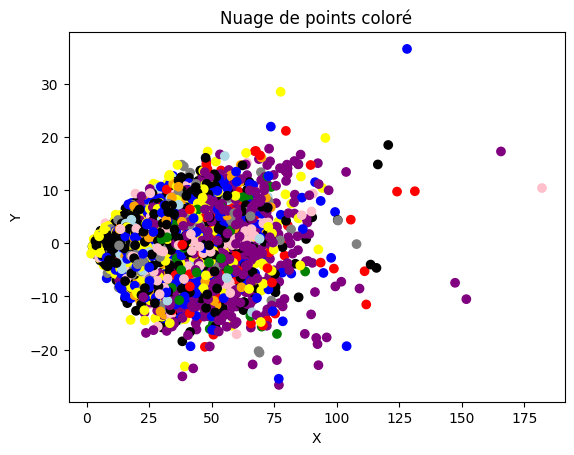

In [57]:
df_components = pca_on_sparse_matrix(matrice_bow, num_components=2)
#df_components, df_projection =pca_and_project_sparse_matrix(matrice_bow, target_dimension=2)
print("Projection des vecteurs représentant les textes dans la nouvelle base de dimension 2:\n", df_components)
ict_couleurs = {'Libertés, Indépendants, Outre-mer et Territoires': 'grey',
        'Les Républicains': 'blue',
        'Démocrate (MoDem et Indépendants)': 'orange',
        'Renaissance': 'yellow',
        'Gauche démocrate et républicaine - NUPES': 'red',
        'La France insoumise - Nouvelle Union Populaire écologique et sociale': 'purple',
        'Rassemblement National': 'black',
        'Horizons et apparentés': 'lightblue',
        'Écologiste - NUPES': 'green',
        'Socialistes et apparentés': 'pink',
        'Non inscrit': 'grey'}
len(df_questions['groupe'])
tracer_points_colores(df_components, df_questions['groupe'],ict_couleurs)

On a représenté sur le plan les questions posées à l'aide d'une ACP. Les couleurs correspondent aux différents groupes politiques. Là encore, il est difficile de distinguer une tendance, ce qui confirme l'idée selon laquelle la vectorisation effectuée ne permet pas de faire émerger les éléments du discours politiques correspondant à des différences politiques.